In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from os.path import isdir, join, isfile

In [4]:
import datetime
import pandas as pd
import seaborn as sns

In [5]:
dir_run1 = "../data/tests_performance/N128_OMP16_32nodes_2node"
dir_run2 = "../data/tests_performance/N128_OMP16_32nodes_bp4"

assert(isdir(dir_run1))
assert(isdir(dir_run2))

In [6]:
logfile_run1 = join(dir_run1, "delta.log")
logfile_run2 = join(dir_run2, "delta.log")

assert(isfile(logfile_run1))
assert(isfile(logfile_run2))

In [7]:
columns = ["time_log", "tidx", "time_fft", "mode"]

dframe = pd.DataFrame(columns=columns)

In [8]:
with open(logfile_run1, "r") as df:
    l0 = df.readline()
    splits = l0.split()
    # There is a , that needs to be removed
    fix_mus = splits[2].replace(",", ".", 1)
    fix_mus = fix_mus.replace(",", "")
    toff_run1 = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 

    for line in df:
        if "FFT took" in line:
            splits = line.split()
            fix_mus = splits[2].replace(",", ".", 1)
            fix_mus = fix_mus.replace(",", "")
            time_log = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
            tidx = int(splits[10][:-1])
            time_fft = float(splits[13][:-1])
            
            
            new_row = {"time_log": time_log - toff_run1, "tidx":int(splits[10][:-1]), 
                       "time_fft": datetime.timedelta(seconds=float(splits[13][:-1])),
                       "mode": "2node"}
            dframe = dframe.append(new_row, ignore_index=True)

In [9]:
with open(logfile_run2, "r") as df:
    l0 = df.readline()
    splits = l0.split()
    # There is a , that needs to be removed
    fix_mus = splits[2].replace(",", ".", 1)
    fix_mus = fix_mus.replace(",", "")
    toff_run2 = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 

    for line in df:
        if "FFT took" in line:
            splits = line.split()
            fix_mus = splits[2].replace(",", ".", 1)
            fix_mus = fix_mus.replace(",", "")
            time_log = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
            tidx = int(splits[10][:-1])
            time_fft = float(splits[13][:-1])
            
            
            new_row = {"time_log": time_log - toff_run2, "tidx":int(splits[10][:-1]), 
                       "time_fft": datetime.timedelta(seconds=float(splits[13][:-1])),
                       "mode": "bp4"}
            dframe = dframe.append(new_row, ignore_index=True)

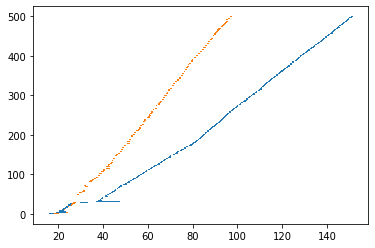

In [10]:
fig, ax = plt.subplots()

for index, row in dframe.iterrows():
    toff = row.time_log.seconds + row.time_log.microseconds * 1e-6
    tdelta = row.time_fft.seconds + row.time_fft.microseconds * 1e-6

    fc = None
    if row["mode"] == "bp4":
        fc = "C0"
    elif row["mode"] == "2node":
        fc = "C1"
    
    ax.broken_barh([(toff, tdelta)], (row.tidx, 1), facecolors=fc)



In [14]:
dframe["time_fft_secs"] = dframe["time_fft"].apply(lambda x: x.seconds + x.microseconds * 1e-6)

[Text(0, 0, '2-node'), Text(0, 0, 'file')]

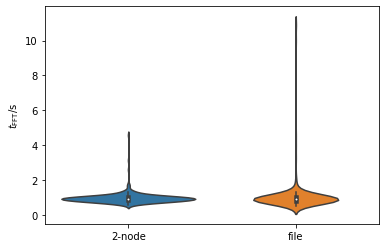

In [21]:


ax = sns.violinplot(x="mode", y="time_fft_secs", data=dframe)
ax.set(ylabel=r"$t_{\mathrm{FFT}} / \mathrm{s}$", xlabel="")
ax.set_xticklabels(["2-node", "file"])